In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.text import *

In [4]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/root/.fastai/data/imdb/README'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/unsup'),
 PosixPath('/root/.fastai/data/imdb/test'),
 PosixPath('/root/.fastai/data/imdb/train'),
 PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/tmp_clas')]

Mounting Drive since training takes and long time and runtime may disconnect.This step is not required if code is run locally

In [55]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [19]:
bs = 48
data_lm = TextList.from_folder(path).filter_by_folder(['train','test','unsup']).split_by_rand_pct(0.1).label_for_lm().databunch(bs=bs)

In [0]:
data_lm.save('data_lm')

In [0]:
save_dir = Path('/content/gdrive/My Drive/Colab Notebooks/imdb')
save_dir.mkdir(exist_ok = True,parents=True)

In [0]:
cp -rf /root/.fastai/data/imdb/data_* /content/gdrive/My\ Drive/Colab\ Notebooks/imdb/

In [27]:
data_lm.show_batch(3)

idx,text
0,"the xxup uk . xxmaj one of the stupid things i noticed in it though was the mutants . xxmaj they were the most useless bunch of bad guys ever , they always messed everything up from start to finish instead of just messing it up at the end ( like most other villains do ) and thank god for xxmaj mumm - ra who is a pretty decent bad"
1,"his investigation pairs him with xxmaj melissa xxmaj robinson ( "" xxmaj friends "" xxmaj courteney xxmaj cox ) , and the two uncover some startling details about the xxmaj miami team 's history , and one of its most controversial players , who missed the field goal kick at the 1984 xxmaj super xxmaj bowl that would have won the game and blames xxmaj dan xxmaj marino for the"
2,"movies seriously . \n \n xxmaj totally a guilty pleasure movie . xxmaj cheesy and funny . xxmaj what makes it even better is imagining xxup sd rehearsing her lines , actually taking the job xxunk 's my motivation ? xxmaj what would xxmaj lorie do ? "" xxmaj wm . xxmaj devane is not my idea of a sexy sexy older man for a younger girl -- xxmaj"


In [31]:
data_lm.vocab.itos[:5]

['xxunk', 'xxpad', 'xxbos', 'xxeos', 'xxfld']

In [32]:
learn_lm = language_model_learner(data_lm,AWD_LSTM,drop_mult=0.25)

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


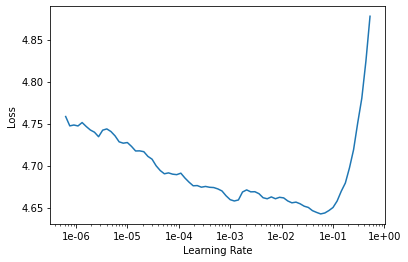

In [34]:
learn_lm.lr_find()
learn_lm.recorder.plot(skip_end=15)

In [35]:
learn_lm.fit_one_cycle(2,1e-02,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.215041,4.169516,0.282346,26:01
1,4.078322,4.014739,0.296582,25:58


Saving progress


In [0]:
learn_lm.save('learn_lm')
cp -rf /root/.fastai/data/imdb/mod* /content/gdrive/My\ Drive/Colab\ Notebooks/imdb/

In [0]:
learn_lm.load('learn_lm')
learn_lm.unfreeze()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


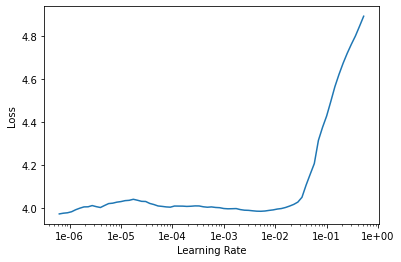

In [40]:
learn_lm.unfreeze()
learn_lm.lr_find()
learn_lm.recorder.plot(skip_end=15)

In [45]:
learn_lm.fit_one_cycle(2,3e-03,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.931173,3.884365,0.312087,26:14
1,3.737537,3.726410,0.330173,26:14


In [0]:
learn_lm.save('temp')


In [0]:
cp -rf /root/.fastai/data/imdb/models/temp.pth /content/gdrive/My\ Drive/Colab\ Notebooks/imdb/models/

In [52]:
learn_lm.fit_one_cycle(2,3e-03,moms=(0.8,0.7))


epoch,train_loss,valid_loss,accuracy,time
0,3.813136,3.829501,0.317822,26:20
1,3.670476,3.702002,0.333096,26:14


In [0]:
learn_lm.save('temp')


In [0]:
cp -rf /root/.fastai/data/imdb/models/temp.pth /content/gdrive/My\ Drive/Colab\ Notebooks/imdb/models/

In [0]:
learn_lm.load('temp')

In [61]:
learn_lm.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,3.687859,3.722256,0.330559,26:17
1,3.615731,3.686267,0.334647,26:14


In [0]:
learn_lm.save('temp')


In [0]:
cp -rf /root/.fastai/data/imdb/models/temp.pth /content/gdrive/My\ Drive/Colab\ Notebooks/imdb/models/

In [66]:
learn_lm.fit_one_cycle(2,moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.626020,3.712825,0.330969,26:15
1,3.586131,3.680550,0.335111,26:13


In [0]:
learn_lm.save('Learn_lm')


In [0]:
cp -rf /root/.fastai/data/imdb/models/Learn_lm.pth /content/gdrive/My\ Drive/Colab\ Notebooks/imdb/models/

In [0]:
#prediction

In [0]:
N_words = 20
N_sentences = 3
sentence = 'The movie was exhausting to watch'

In [90]:
print("\n".join(learn_lm.predict(sentence,N_words,temperature=0.7) for _ in range(N_sentences)))

The movie was exhausting to watch . The plot was slow , the acting was terrible , the direction was poor , the editing was
The movie was exhausting to watch . It had no plot , no character development , and no story . i 'm not sure what
The movie was exhausting to watch , and it was only because of the Musical Act . It was a pure musical and


In [0]:
learn_lm.save_encoder('learn-enc')

In [116]:
data_cls = TextList.from_folder(path).split_by_folder(valid='test').label_from_folder(classes=['neg','pos']).databunch(bs=48)

In [117]:
data_cls.show_batch(3)

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos xxmaj by now you 've probably heard a bit about the new xxmaj disney dub of xxmaj miyazaki 's classic film , xxmaj laputa : xxmaj castle xxmaj in xxmaj the xxmaj sky . xxmaj during late summer of 1998 , xxmaj disney released "" xxmaj kiki 's xxmaj delivery xxmaj service "" on video which included a preview of the xxmaj laputa dub saying it was due out",pos
"xxbos xxmaj some have praised xxunk xxmaj lost xxmaj xxunk as a xxmaj disney adventure for adults . i do n't think so -- at least not for thinking adults . \n \n xxmaj this script suggests a beginning as a live - action movie , that struck someone as the type of crap you can not sell to adults anymore . xxmaj the "" crack staff "" of",neg


In [0]:
data_cls.save('data_cls')

In [0]:
cp -rf /root/.fastai/data/imdb/data_cls* /content/gdrive/My\ Drive/Colab\ Notebooks/imdb/

In [0]:
learn_cls = text_classifier_learner(data_cls,AWD_LSTM,drop_mult=0.5)
learn_cls.load_encoder('learn-enc')

In [0]:
learn_cls.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


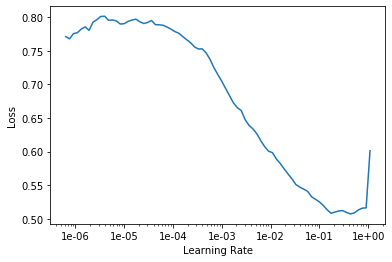

In [0]:
learn_cls.recorder.plot()

In [0]:
learn_cls.fit_one_cycle(1,2e-02,moms = (0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.276926,0.220383,0.913760,09:09


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


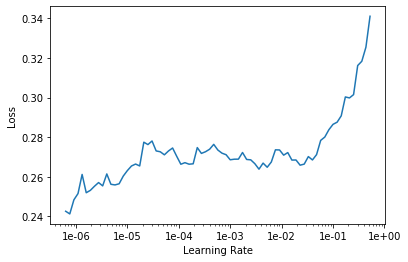

In [0]:
learn_cls.freeze_to(-2)
learn_cls.lr_find()
learn_cls.recorder.plot()

In [0]:
learn_cls.fit_one_cycle(1,slice(1e-02/(2.6**4),1e-02),moms=(0.7,0.8))

epoch,train_loss,valid_loss,accuracy,time
0,0.254996,0.203313,0.919800,09:59


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


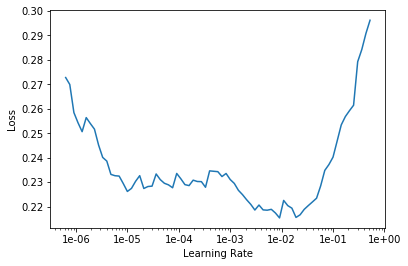

In [0]:
learn_cls.freeze_to(-3)
learn_cls.lr_find()
learn_cls.recorder.plot()

In [0]:
learn_cls.fit_one_cycle(1,slice(5e-03/(2.6**4),5e-03),moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.225611,0.191121,0.925560,09:58


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


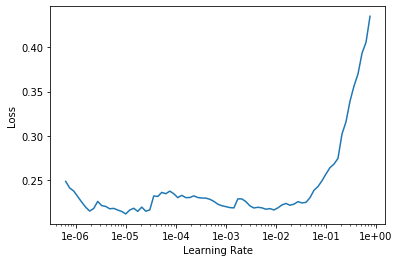

In [0]:
learn_cls.unfreeze()
learn_cls.lr_find()
learn_cls.recorder.plot()

In [0]:
learn_cls.save('Pre-Final')

In [0]:
learn_cls.unfreeze()

In [0]:
learn_cls.fit_one_cycle(2,slice(3e-03/(2.6**4),3e-03),moms=(0.7,0.8))

epoch,train_loss,valid_loss,accuracy,time
0,0.205069,0.186410,0.926120,08:19
1,0.195765,0.184027,0.927480,08:41


In [0]:
learn_cls.summary()

SequentialRNN
Layer (type)         Output Shape         Param #    Trainable 
RNNDropout           [61, 400]            0          False     
______________________________________________________________________
RNNDropout           [61, 1152]           0          False     
______________________________________________________________________
RNNDropout           [61, 1152]           0          False     
______________________________________________________________________
BatchNorm1d          [1200]               2,400      True      
______________________________________________________________________
Dropout              [1200]               0          False     
______________________________________________________________________
Linear               [50]                 60,050     True      
______________________________________________________________________
ReLU                 [50]                 0          False     
________________________________________________

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
data_cls.valid_ds[7437]

(Text xxbos i enjoyed this programme immensely . xxmaj it is exceptionally well written , with finely judged performances and clever visuals . 
  
   xxmaj it is also very frank and honest , refreshing compared to the sanitised representation of drug use in films and television . 
  
   xxmaj unmissable - one of the finest television shows of recent years , and triumph on all scales for xxmaj channel 4 . 
  
   9 / 10, Category pos)

In [0]:
learn.predict(data_cls.valid_ds[7437])

(Category pos, tensor(0), tensor([1.0000e+00, 1.0365e-06]))